In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [ ]:
df = pd.read_csv('C:/Users/William/MSFT.csv').fillna(0)
df.tail(6)

Text(0.5, 1.0, 'Microsoft Autocorellation plot')

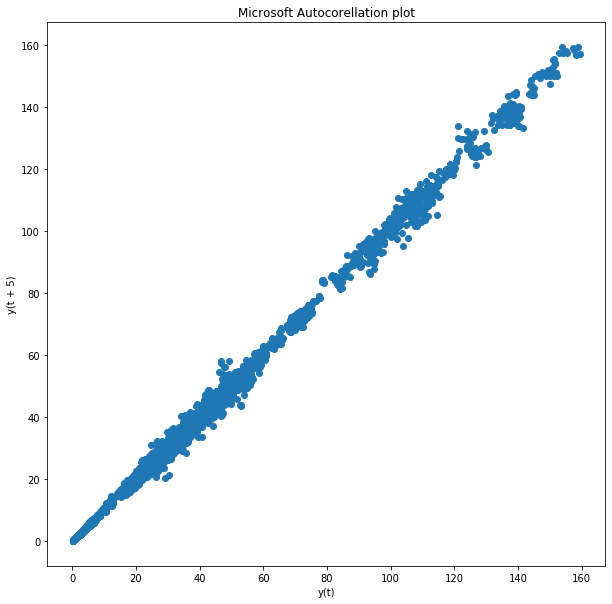

In [5]:
plt.figure(figsize= (10, 10))
lag_plot(df['Open'], lag= 5)
plt.title('Microsoft Autocorellation plot')

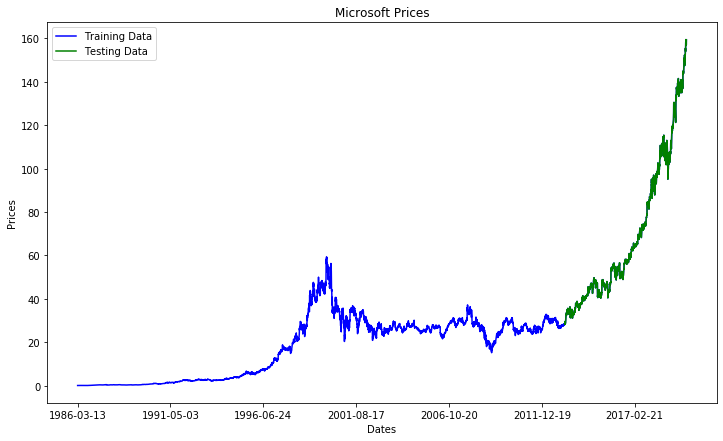

In [6]:
# TRAINING AND TESTING DATA
train_data, test_data = df[0: int(len(df)*0.8)], df[int(len(df)*0.8):]
plt.figure(figsize=(12,7))
plt.plot(df['Open'], 'blue', label = 'Training Data')
plt.title('Microsoft Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(test_data['Open'], 'green', label = 'Testing Data')
plt.xticks(np.arange(0,7982, 1300), df['Date'][0:7982:1300])
plt.legend()

In [7]:
def smape(A,F):
    return np.mean((np.abs(A-F)*200/(np.abs(A) + np.abs(F))))

In [14]:
# Now we create the ARIMA model for our implementation

train_arim= train_data['Open'].values
test_arim = test_data['Open'].values

history= [x for x in train_arim]
print(type(history))
predictions = list()

for t in range(len(test_arim)):
    model = ARIMA(history, order = (5,1,0))
    model_fit= model.fit(disp=0)
    output = model_fit.forecast()
    yhat= output[0]
    predictions.append(yhat)
    obs= test_arim[t]
    history.append(obs)
error= mean_squared_error(test_arim, predictions)
print('Testing Mean Squared error : %.3f' % error)
error2 = smape(test_arim, predictions)
print('Symmetric mean absolute percentage prediction error: %.3f' % error2)

<class 'list'>
Testing Mean Squared error : 1.113
Symmetric mean absolute percentage prediction error: 48.725


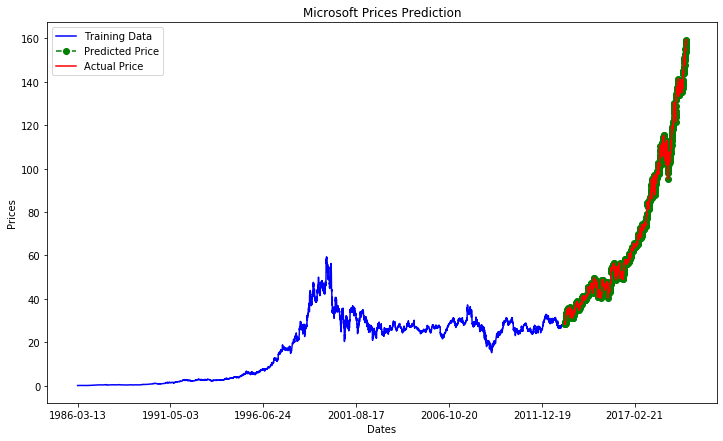

In [12]:
plt.figure(figsize = (12, 7))
plt.plot(df['Open'], 'green', color = 'blue', label = 'Training Data')
plt.plot(test_data.index, predictions, color = 'green', marker = 'o', linestyle = 'dashed', 
         label = 'Predicted Price')
plt.plot(test_data.index, test_data['Open'], color = 'red', label = 'Actual Price')

plt.title ('Microsoft Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(np.arange(0,7982, 1300), df['Date'][0:7982:1300])
plt.legend()

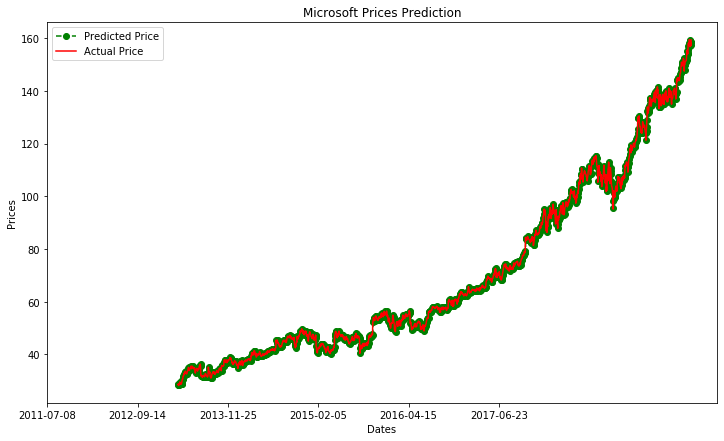

In [13]:
plt.figure(figsize = (12, 7))
plt.plot(test_data.index, predictions, color = 'green', marker = 'o', linestyle = 'dashed', label = 'Predicted Price')
plt.plot(test_data.index, test_data['Open'], color = 'red', label = 'Actual Price')
plt.legend()

plt.title('Microsoft Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(np.arange(6386, 7982, 300), df['Date'][6386:7982:300])
plt.legend()